# Explore here

In [2]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

In [3]:
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
total_data.shape #shape is not a method, no () necessary

(48895, 16)

In [5]:
total_data.info() # are there null values in the rows? Is the data numerical or categorical?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# NaN = object records, mixed data type, id is also categorical, numbers are used to identify hosts (categories), not to do operations/math with it
# categorical values range is limited (not continuous)
# if we want host id to be numerical, we can factorise it to be numerical

# Check for NaN/no values/duplicated values in columns we know we are going to use
# Check for null values in the dataset
null_values = total_data.isnull().sum()
# Print the columns with null values and their respective counts
print("Columns with null values:")
print(null_values[null_values > 0]) # display columns that have more than 0 null values (otherwise it is ok)

Columns with null values:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [ ]:
# When we have a lot of null values in an interesting column: fill in nulls with 0 or other values
# Null values can be very high, in that case drop the column
# If the null values don't overpower the rest of the data, keep them

# Converting the data to 0 etc is useful to visualise it 
# Before using the model, we need to revert the null values to NaN, so the model
# will not learn from the 0 but instead go over the NaN values

In [9]:
# Convert null values to something else:
# Fill null values with 0
total_data_filled_with_0 = total_data.fillna(0) # placeholder 0
# Alternative: fill null values with 1 : total_data_filled_with_1 = total_data.fillna(1)


In [11]:
null_values = total_data.isnull().sum()
print("Columns with null values:")
print(null_values[null_values > 0])
# no null values

Columns with null values:
Series([], dtype: int64)


In [7]:
print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


In [8]:
# TO drop information/columns we do not need
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


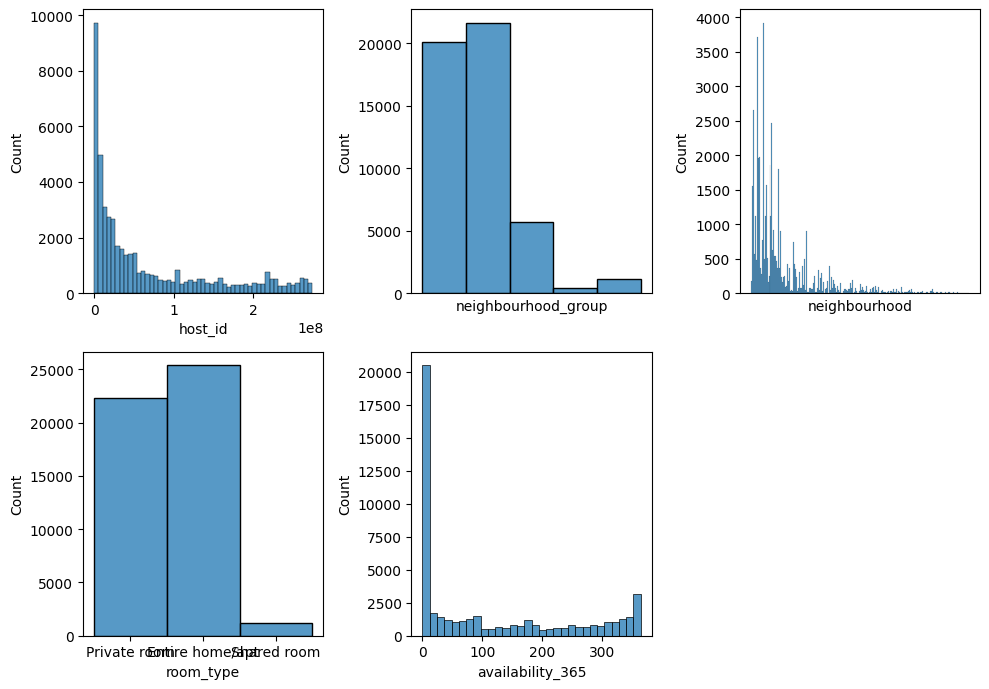

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

# General first look at the categorical data with plotting

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([]) # set_xticks removes tick marks indicating specific values on the x axis
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Also for numerical values we can do a general plotting, with for example boxplot or histograms

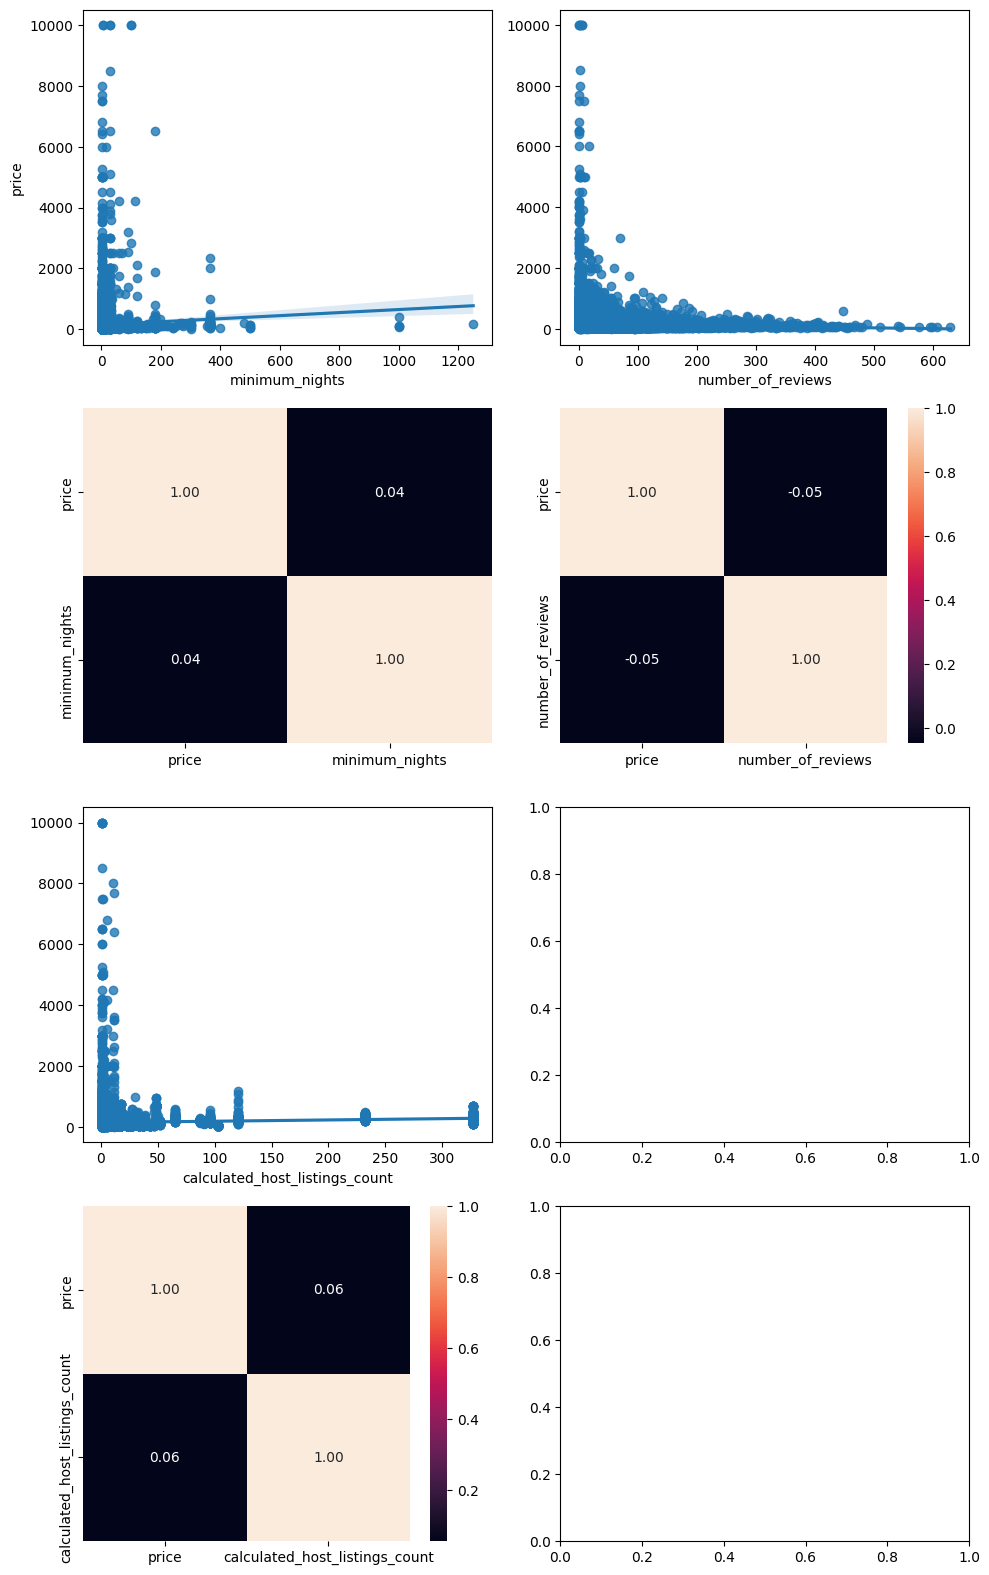

In [14]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price") # looks like a scatterplot, can be used to see if the data is a good fit for the linear regression model
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False) # annot -> to diplay numbers on the heatmap, fmt -> round to two decimal points, cbar = colourbar -> False not ot have it

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1]) # to take 2, 1 and 3, 1 empty graphs away

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()